<a href="https://colab.research.google.com/github/spacecoderr/deep_learning/blob/main/mnist_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"spacecoderr","key":"b01ff805ba48add9d80222018d7d1cdb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json




In [ ]:
!oddrationale/mnist-in-csv


/bin/bash: line 1: oddrationale/mnist-in-csv: No such file or directory


In [ ]:
!kaggle datasets download -d oddrationale/mnist-in-csv
!unzip mnist-in-csv.zip


Dataset URL: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv
License(s): CC0-1.0
  0% 0.00/15.2M [00:00<?, ?B/s]
100% 15.2M/15.2M [00:00<00:00, 1.02GB/s]
Archive:  mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [ ]:
data=pd.read_csv('mnist_train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=data.drop('label',axis=1)
y=data['label']

In [ ]:
 data=np.array(data)
 np.random.shuffle(data)
 m,n=data.shape

In [ ]:
data_test=data[0:10000].T
X_test=data_test[1:n]
y_test=data_test[0]

data_train=data[10000:m].T
X_train=data_train[1:n]
y_train=data_train[0]


In [ ]:
X_train=X_train/255.0
X_test=X_test/255

In [ ]:
def init_params():
  W1=np.random.randn(10,784)
  b1=np.random.randn(10,1)
  W2=np.random.randn(10,10)
  b2=np.random.randn(10,1)
  return W1,b1,W2,b2

In [ ]:
def relu(x):
  return np.maximum(0,x)

In [ ]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

In [ ]:
def forward_prop(W1,b1,W2,b2,X):
  Z1=W1.dot(X)+b1
  A1=relu(Z1)
  Z2=W2.dot(A1)+b2
  A2=softmax(Z2)
  return Z1,A1,Z2,A2

In [ ]:
def one_hot_encode(y, num_classes=10):
    m = y.size
    one_hot = np.zeros((num_classes, m))
    for i in range(m):
        one_hot[int(y[i])][i] = 1
    return one_hot


In [ ]:
def deriv_ReLU(Z):
  return Z>0

In [ ]:
def back_prop(Z1, A1, Z2, A2, W2, X, y):
    m = y.size

    one_hot_Y = one_hot_encode(y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2


In [ ]:
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
  W1=W1-alpha*dW1
  b1=b1-alpha*db1
  W2=W2-alpha*dW2
  b2=b2-alpha*db2
  return W1,b1,W2,b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, y):
    return np.sum(predictions == y) / y.size

In [ ]:
def gradient_descent(X,y,alpha,iterations):
  W1,b1,W2,b2=init_params()
  for i in range(iterations):
    Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if(i%10==0):
      print("iteration:",i)
      print("accuracy:",get_accuracy(get_predictions(A2),y))
  return W1,b1,W2,b2


In [ ]:
W1,b1,W2,b2=gradient_descent(X_train,y_train,0.001,500)

iteration: 0
accuracy: 0.10548
iteration: 10
accuracy: 0.10596
iteration: 20
accuracy: 0.10628
iteration: 30
accuracy: 0.10684
iteration: 40
accuracy: 0.10734
iteration: 50
accuracy: 0.10748
iteration: 60
accuracy: 0.10788
iteration: 70
accuracy: 0.10842
iteration: 80
accuracy: 0.10886
iteration: 90
accuracy: 0.10936
iteration: 100
accuracy: 0.10968
iteration: 110
accuracy: 0.10998
iteration: 120
accuracy: 0.1106
iteration: 130
accuracy: 0.11102
iteration: 140
accuracy: 0.11132
iteration: 150
accuracy: 0.11124
iteration: 160
accuracy: 0.11154
iteration: 170
accuracy: 0.11188
iteration: 180
accuracy: 0.1124
iteration: 190
accuracy: 0.11274
iteration: 200
accuracy: 0.11282
iteration: 210
accuracy: 0.11306
iteration: 220
accuracy: 0.1135
iteration: 230
accuracy: 0.11354
iteration: 240
accuracy: 0.11382
iteration: 250
accuracy: 0.11422
iteration: 260
accuracy: 0.11432
iteration: 270
accuracy: 0.11466
iteration: 280
accuracy: 0.11486
iteration: 290
accuracy: 0.11506
iteration: 300
accuracy:

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [ ]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.title(f"Prediction: {prediction[0]}, Actual: {label}")
    plt.show()


Prediction:  [0]
Label:  7


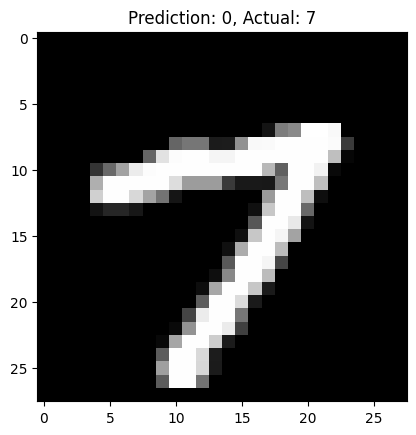

In [ ]:
test_prediction(600,W1, b1, W2, b2)